## Linear Regression-II

In this tutorial, we discuss the following concepts:

1. Types of Data Variables
2. Transformation of Features
   
   2.1 One-Hot Encoding/Ordinal Encoding
   
   2.2 Feature Scaling
   
   2.3 Transformation Pipelines
3. Performance Measures for Regression
4. Optimal Model: Subset selection (or selection of features)
5. Training through Gradient Descent 
6. Cross-Validation
7. Regularization
8. Fine-Tuning the model  

### 1. Types of Features
- Features are often classified based on the arithmetic properties they support.
- There are two types of features: Continuous and Discrete.
- Features which are continuous assumes any real numbers.
- Features which are discrete takes only a particular value from the set of possible values.
- Discrete features furthur divided into different categories: *Nominal Features*, *Ordinal Features*.
- Nominal (data) features can take any arbitrary nonnumerical values. This kind of data can neither be measured nor compared. For instance, names, adress, gender, etc., can be consider as nominal data attributes.
- There is no arithmetic operations can be applied on nominal data. 
- Ordinal data attributes assumes the values which has an order. For instance, T-shirt sizes (S, M, L, XL, etc.), Likert scale in customer survey (Always, Sometimes, Rarely, Never), and so on are examples of ordinal data.  


### 2. Transformation

- Most of the ML algorithms prefer to work with numbers.
- Thus we need to learn different encoding techniques for Categorical features (Nominal or Ordinal) to convert from text to numbers.

#### 2.1 Transforming Nominal/Ordinal Attributes

- In the attribute **Gender**, we may have three values - Male, Female, and Other.
- This is a Nominal attribute as arithmetic operations can't applied, and we can't compute the values with each other.
- Consider the following snippet:

In [19]:
import pandas as pd
df = pd.DataFrame([["Ramana","Male",28,"Bachelors"],
["Arnav Sharma","Male",23,"Masters"],
["Sourav","Other", 30,"Doctoral"],
["Sophia","Female",19,"High School"]], columns=['Name','Gender','Age',
'Degree'])
df1 = df.copy()

In [20]:
df1

,Name,Gender,Age,Degree
0,Ramana,Male,28,Bachelors
1,Arnav Sharma,Male,23,Masters
2,Sourav,Other,30,Doctoral
3,Sophia,Female,19,High School


In [8]:
df

,Name,Gender,Age,Degree
0,Ramana,Male,28,Bachelors
1,Arnav Sharma,Male,23,Masters
2,Sourav,Other,30,Doctoral
3,Sophia,Female,19,High School


- In the above dataframe, `Gender` attribute is *nominal* where as `Degree` attribute is Ordinal.
- To convert categorical variables into numeric,we perform the *One-Hot Encoding* for the *nominal* attribute and *Ordinal Encoding* for the ordinal attribute.

In [21]:
#load the one-hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
encoder_gender = OneHotEncoder().fit(df1[['Gender']])

In [10]:
encoder_gender.categories_

[array(['Female', 'Male', 'Other'], dtype=object)]

In [22]:
gender_values = encoder_gender.transform(df1[['Gender']])
gender_values.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [23]:
df1[['Gender_F','Gender_M','Gender_O']] = gender_values.toarray()

In [24]:
df1

,Name,Gender,Age,Degree,Gender_F,Gender_M,Gender_O
0,Ramana,Male,28,Bachelors,0.0,1.0,0.0
1,Arnav Sharma,Male,23,Masters,0.0,1.0,0.0
2,Sourav,Other,30,Doctoral,0.0,0.0,1.0
3,Sophia,Female,19,High School,1.0,0.0,0.0


In [25]:
#load the ordinal encoder from skelarn
from sklearn.preprocessing import OrdinalEncoder
encoder_education = OrdinalEncoder()
encoder_education.fit_transform(df[["Degree"]])
encoder_education.categories_

[array(['Bachelors', 'Doctoral', 'High School', 'Masters'], dtype=object)]

In [16]:
df1[["Degree_Encoded"]] = encoder_education.fit_transform(df[["Degree"]]) 
df1

,Name,Gender,Age,Degree,Gender_F,Gender_M,Gender_O,Degree_Encoded
0,Ramana,Male,28,Bachelors,0.0,1.0,0.0,0.0
1,Arnav Sharma,Male,23,Masters,0.0,1.0,0.0,3.0
2,Sourav,Other,30,Doctoral,0.0,0.0,1.0,1.0
3,Sophia,Female,19,High School,1.0,0.0,0.0,2.0


We except an order as High School>Bachelors>Masters>Doctoral. We initialize based on our expectation.  


In [26]:
encoder_for_education = OrdinalEncoder(categories = [['High School','Bachelors','Masters','Doctoral']])
df1[['Degree_encoded']] = encoder_for_education.fit_transform(df1[['Degree']])

In [27]:
df1

,Name,Gender,Age,Degree,Gender_F,Gender_M,Gender_O,Degree_encoded
0,Ramana,Male,28,Bachelors,0.0,1.0,0.0,1.0
1,Arnav Sharma,Male,23,Masters,0.0,1.0,0.0,2.0
2,Sourav,Other,30,Doctoral,0.0,0.0,1.0,3.0
3,Sophia,Female,19,High School,1.0,0.0,0.0,0.0


Now we converted the attributes `Gender` and `Degree` as numeric. We an drop them along with the `Name` attribute.

In [28]:
df1.drop(columns=["Name","Gender","Degree"],inplace=True)
df1

,Age,Gender_F,Gender_M,Gender_O,Degree_encoded
0,28,0.0,1.0,0.0,1.0
1,23,0.0,1.0,0.0,2.0
2,30,0.0,0.0,1.0,3.0
3,19,1.0,0.0,0.0,0.0


In [29]:
df2 = df1.copy()
df2

,Age,Gender_F,Gender_M,Gender_O,Degree_encoded
0,28,0.0,1.0,0.0,1.0
1,23,0.0,1.0,0.0,2.0
2,30,0.0,0.0,1.0,3.0
3,19,1.0,0.0,0.0,0.0


### 2.2 Transformation of numerical attributes: Feature Scaling

- Most important transformations to apply to data is *feature scaling*
- In some cases, if the input numerical features have very different scales, the ML algorithm doesn't perform well. 
- We prefer to use the same scaling for all the input features. 
- There are two common ways to get all features to have the same scale: *min max scaling* (or sometimes called as *Normalization* ) and *standardization*.
- In normalization, values are shifted and rescaled so that they end up ranging from 0 to 1.  
$$ x \rightarrow x_{normalized}={x-x_{min}\over x_{max}-x_{min}}$$ 
- In standardization, values are shifted and rescaled so that they end up the datapoints have mean 0 and standard deviation 1. 
$$x\rightarrow x_{std} = {x-\bar{x}\over s}$$

In [30]:
import numpy as np 
#load an array
x = np.array([[1,2,3,10,-1],[1,-10, 4, 6,8]])
#normalization
xnorm = (x-np.min(x))/(np.max(x)-np.min(x)) 
print(f"The normalization of x:\n {xnorm}")

xstd = (x-np.mean(x))/np.std(x)
print(f"The Standardization of x:\n {xstd}")

The normalization of x:
 [[0.55 0.6  0.65 1.   0.45]
 [0.55 0.   0.7  0.8  0.9 ]]
The Standardization of x:
 [[-0.26726124 -0.07636035  0.11454053  1.45084674 -0.64906302]
 [-0.26726124 -2.367171    0.30544142  0.68724319  1.06904497]]


Scikit-Learn provides functions for these transformers namely `MinMaxScaler` and `StandardScaler` 

In [31]:
#load mini-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1[['Age']])
df1['Age'] = scaler.transform(df1[['Age']])
df1

,Age,Gender_F,Gender_M,Gender_O,Degree_encoded
0,0.818182,0.0,1.0,0.0,1.0
1,0.363636,0.0,1.0,0.0,2.0
2,1.000000,0.0,0.0,1.0,3.0
3,0.000000,1.0,0.0,0.0,0.0


In [32]:
#load StandardScalar from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2[['Age']])
df2['Age'] = scaler.transform(df2[['Age']])
df2 

,Age,Gender_F,Gender_M,Gender_O,Degree_encoded
0,0.697486,0.0,1.0,0.0,1.0
1,-0.464991,0.0,1.0,0.0,2.0
2,1.162476,0.0,0.0,1.0,3.0
3,-1.394972,1.0,0.0,0.0,0.0


### 2.3 Transformation Pipelines

- A sequence of data processing components is called a data `pipeline`.
- Pipelines are very common in Machine Learning systems, since there is lot of data to manipulate and many data transformations to apply. 
- Scikit-Learn provides the `Pipeline` class to help with sequence of transformations. 
- In Scikit-Learn version 0.20 introduced `ColumnTransformer` class, which helps to preprocess categorical and numerical features at the same time.
- Look at the snippet of code:


In [36]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("std_scaler",StandardScaler())
])
cat_attributes = ["Gender","Degree"]
num_attributes = ["Age"] 

encoder_for_education = OrdinalEncoder(categories = [['High School','Bachelors','Masters','Doctoral']])

full_pipeline = ColumnTransformer([
    ("num",StandardScaler(),["Age"]),
    ("One-hot",OneHotEncoder(),["Gender"]),
    ("ordinal",encoder_for_education,["Degree"])
])

df_prep = full_pipeline.fit_transform(df)
print(df_prep)
type(df_prep)

[[ 0.69748583  0.          1.          0.          1.        ]
 [-0.46499055  0.          1.          0.          2.        ]
 [ 1.16247639  0.          0.          1.          3.        ]
 [-1.39497166  1.          0.          0.          0.        ]]


numpy.ndarray

In [37]:
pd.DataFrame(df_prep, columns=["Age","GF","GM","GO","Degree"])

,Age,GF,GM,GO,Degree
0,0.697486,0.0,1.0,0.0,1.0
1,-0.464991,0.0,1.0,0.0,2.0
2,1.162476,0.0,0.0,1.0,3.0
3,-1.394972,1.0,0.0,0.0,0.0


### 3. Performance Measures

For regression problems the typical performance measure is the **Root Mean Square Error** (RMSE). Also known as **Residual Sum of Squares** (RSS) which is defined as below:
$$RMSE({\bf X}, w) = \sqrt{{1\over n}\sum_{i=1}^n\Big(y^{(i)}-f({\bf x}^{(i)})\Big)^2} ={1\over \sqrt{n}}\|y-f({\bf X})\|_2 $$
-  $n$ is the number of observations in the dataset
-  ${\bf x}^{(i)}$ is a vector of all the feature values of the $i^{\text{th}}$ instance in the dataset, and $y^{(i)}$ is its label.
-  ${\bf X}$ is a matrix containg all the feature values of all instances in the dataset.
-  $f$ is the prediction function, also called the `hypothesis`.
-  The predicted output for the instance ${\bf x}^{(i)}$ is denoted as $\hat{y}^{(i)}=f({\bf x}^{(i)}).$

There is another performance measure for regression tasks, which is called **Mean Absolute Error** (MAE), defined as  
$$MAE({\bf X}, w) = {1\over n}\sum_{i=1}^n\Big|\Big(y^{(i)}-f({\bf x}^{(i)})\Big)\Big|={1\over n}\|y-f({\bf X})\|_1. $$

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values.

- We can use higher the norm index instead of $\ell_1$ or $\ell_2$ norms.
- If the norm index is higher, it focuses on large values and neglect small ones.
- Thus the RMSE is more sensitive to outliers than the MAE. 
- When the outliers are exponentially rare, the RMSE performs very well and is generally preferred.


## 4. Gradient Descent

We optimize our loss function $L({\bf X},w)={1\over n}\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})$ using Gradient Descent algorithm.

In [1]:
#load the libraries
import numpy as np
import pandas as pd

In [ ]:
#load the dataset
credit = pd.read_csv("E:\MDSC-ML\MDSC-ML-Lab\Datasets\Credit.csv")
credit.head()

The dataset can be find [here](https://www.statlearning.com/resources-second-edition).

In [ ]:
#convert Nomial features into numeric using OheHot encoding
credit = pd.get_dummies(credit, columns = ['Own', 'Student','Married','Region'],drop_first = True)
credit.head()

In [2]:
#loass function
def loss_functuon(X,y,w):
    #initialization of useful values
    m = np.size(y)
    
    #loss function
    f = X @ w 
    L = float((1./2*m)*(f-y).T@(f-y)) 
    return L 

In [ ]:
def gradient_ascent(X,lrate,precision):
    step = 1
    #print(f"\n\n***Gradient Ascent***")
    X_hist = []
    condition = True
    while condition:
        x1_new,x2_new = x1+lrate*f_x(x1,x2),x2+lrate*f_y(x1,x2)
        
        # Print the function value for every 10 steps
        #if step % 5 == 0:
        #    print('iteration %d - x1 = %0.5f, x2 = %0.5f and h(r) = %0.5f' % (step,x1_new,x2_new,f(x1_new,x2_new)))
         
        # Stopping condition  
        if np.sum(abs(np.asarray([x1_new,x2_new])-np.asarray([x1,x2]))) < precision:
            #print(f'Gradient Ascent Converge')
            break
        
        step += 1
        (x1, x2) = (x1_new,x2_new)
        x1_hist.append(x1)
        x2_hist.append(x2)
        
    #print(f'The optimal point (x,y) is {(x1, x2)}')
    return x1_hist, x2_hist


### 4. Choosing Optimal Model: Subset Selection

We not satisfied with the least square estimation for regression model due to the following reasons:
- *Prediction Accuracy*: The estimates often has low bias but large variance. The prediction accuracy can be improved (sometimes) by shrinking or setting some parameters to zero.
- *Interpretation*: With the large number of input features, we often would like to determine a smaller subset of features which exibits the strongest effects.    

In this section, we discuss different approaches to variable subset selction with linear regression. There are three different strategies to choose the subset. Namely:
- Best-Subset Selection
- Forward-Stepwise Selection
- Backward-Stepwise Selection

**Best-Subset Selection**: Best subset regression finds for each $m\in\{0,1,2,\ldots,k\}$ the subset of size $m$ that gives smallest residual sum of squares (RSS). The question of how to choose $m$ involves the tradeoff between bias and variance.
This is infeasible for $k>>40.$


**Forward-Stepwise Selection**: Forward-stepwise selection starts with the intercept, and then sequentially adds into the model the predictor that most improves the fit. This method produces a sequence of models indexed by $m,$ the subset size.


**Back-Stepwise Selection**: It starts with the full model, and sequential deletes the predictor that has the least impact (smallest Z-score) on the fit.  

In [89]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


,Income,Limit,Rating,Cards,Age,Education,Balance,Own_Yes,Student_Yes,Married_Yes,Region_South,Region_West
0,14.891,3606,283,2,34,11,333,0,0,1,1,0
1,106.025,6645,483,3,82,15,903,1,1,1,0,1
2,104.593,7075,514,4,71,11,580,0,0,0,0,1
3,148.924,9504,681,3,36,11,964,1,0,0,0,1
4,55.882,4897,357,2,68,16,331,0,0,1,1,0


In [98]:
#Best selection method based on RSS
#some helper function 
def fit_linear_reg(X,y):
    #fit linear regression model and return RSS and r squared
    model_k = LinearRegression()
    model_k.fit(X,y)
    RSS = mean_squared_error(y,model_k.predict(X))*len(y) 
    R_squared = model_k.score(X,y) 
    adj_R_squared = 1 - (1-R_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return RSS, R_squared, adj_R_squared 

In [100]:
#import tqdm for progress bar 
from tqdm import tnrange, tqdm_notebook
import itertools

#Initialize variables 
y = credit.Balance
X = credit.drop(columns='Balance',axis=1) 

m = 11

RSS_list, R_squared_list, feature_list = [], [], []
adj_R_squared_list = []
numb_features = []

#looping over m=1 to m=11 features in X
#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        adj_R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'Adj_R_squared': adj_R_squared_list, 'features':feature_list})

<ipython-input-100-e86d1b95f84e>:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/11 [00:00<?, ?it/s]

##### Find the best subsets using RSS

In [1]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min).reset_index() == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
df_max_adj = df[df.groupby('numb_features')['Adj_R_squared'].transform(max) == df['Adj_R_squared']]
display(df_min.head())
display(df_max_adj.head(10))


NameError: name 'df' is not defined

In [95]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,6.620874e+07,0.214977,"(Income,)",2.143512e+07,0.745848
1,1,2.171566e+07,0.742522,"(Limit,)",2.143512e+07,0.745848
2,1,2.143512e+07,0.745848,"(Rating,)",2.143512e+07,0.745848
3,1,8.370950e+07,0.007475,"(Cards,)",2.143512e+07,0.745848
4,1,8.433963e+07,0.000003,"(Age,)",2.143512e+07,0.745848


In [105]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df['max_Adj_R_squared'] = df.groupby('numb_features')['Adj_R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,Adj_R_squared,features,min_RSS,max_R_squared,max_Adj_R_squared
0,1,6.620874e+07,0.214977,0.213005,"(Income,)",2.143512e+07,0.745848,0.74521
1,1,2.171566e+07,0.742522,0.741875,"(Limit,)",2.143512e+07,0.745848,0.74521
2,1,2.143512e+07,0.745848,0.745210,"(Rating,)",2.143512e+07,0.745848,0.74521
3,1,8.370950e+07,0.007475,0.004981,"(Cards,)",2.143512e+07,0.745848,0.74521
4,1,8.433963e+07,0.000003,-0.002509,"(Age,)",2.143512e+07,0.745848,0.74521


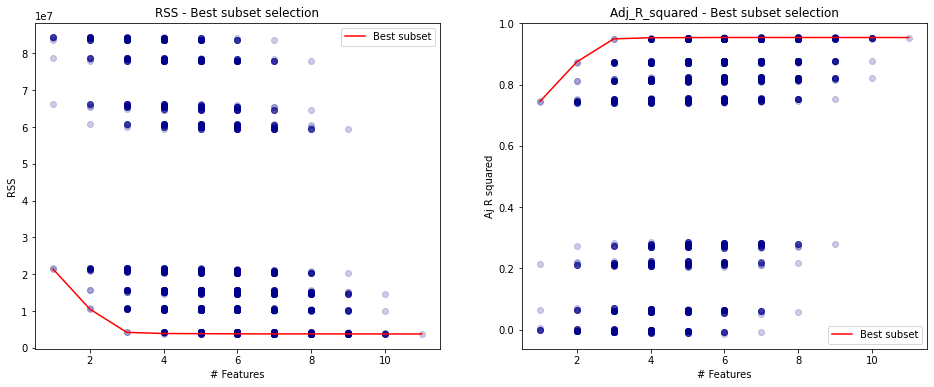

In [107]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.Adj_R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_Adj_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('Aj R squared')
ax.set_title('Adj_R_squared - Best subset selection')
ax.legend()

plt.show()

By observing these plots we can choose $m=6.$ Thus the features part of the linear regression model will be `(Income, Limit, Rating, Cards, Age, Student_Yes)`

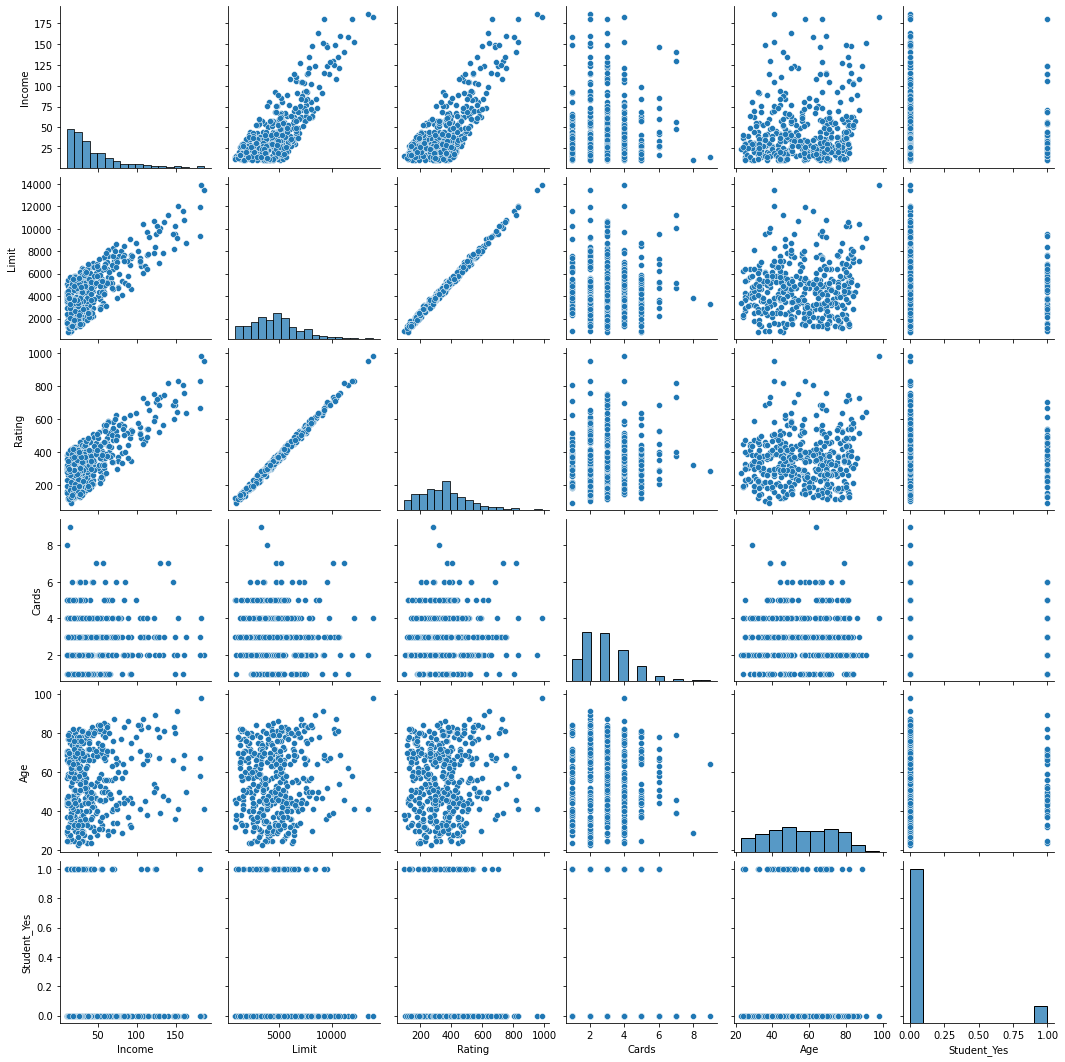

In [110]:
import seaborn as sns 

sns.pairplot(credit[["Income","Limit","Rating","Cards","Age","Student_Yes"]])

### 5. Model Implementation

In [111]:
#modeling
from sklearn.model_selection import train_test_split

X = credit[["Income","Limit","Rating","Cards","Age","Student_Yes"]]
y = credit.Balance

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [112]:
model = LinearRegression() 
model.fit(Xtrain,ytrain)  
model

LinearRegression()

In [117]:
def adj_r_sqr(Xtrain,ytrain,Xtest,ytest):
    model = LinearRegression()  
    model.fit(Xtrain,ytrain)
    r_2_train = model.score(Xtrain,ytrain)
    r_2_test = model.score(Xtest,ytest)
    adj_r_2_train =  1 - (1-r_2_train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
    adj_r_2_test =  1 - (1-r_2_test)*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)  
    return adj_r_2_train,adj_r_2_test

In [118]:
adj_r_sqr(Xtrain,ytrain,Xtest,ytest)

(0.9515379414205772, 0.9591253856932087)

In [115]:
model.score(Xtrain,ytrain)

0.9524494534941714

In [116]:
model.score(Xtest,ytest)

0.9622297867798004

In [114]:
yhat = model.predict(Xtest)
results= pd.DataFrame({"y":ytest,"yhat":yhat})
results.head()

,y,yhat
286,0,-163.314237
226,1032,1015.097241
250,0,115.330170
399,966,933.610579
219,653,636.522214


In [127]:
#load lasso regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [138]:
X

array([[-0.86158299, -0.48999879, -0.46553881, -0.6991298 , -1.2576741 ,
        -0.33333333],
       [ 1.72743711,  0.82826106,  0.82870309,  0.03103187,  1.5284506 ,
         3.        ],
       [ 1.68675551,  1.01478681,  1.02931059,  0.76119355,  0.88996369,
        -0.33333333],
       ...,
       [ 0.35946155, -0.24491264, -0.21963285,  1.49135522,  0.65778663,
        -0.33333333],
       [-0.21280808, -0.95891584, -1.05441888, -1.42929148, -0.67723146,
        -0.33333333],
       [-0.75334493,  0.34199278,  0.38866085,  1.49135522,  0.48365384,
        -0.33333333]])

In [131]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [136]:
def adj_r_sqr_lasso(Xtrain,ytrain,Xtest,ytest):
    model = LinearRegression()  
    model.fit(Xtrain,ytrain)
    r_2_train = model.score(Xtrain,ytrain)
    r_2_test = model.score(Xtest,ytest)
    adj_r_2_train =  1 - (1-r_2_train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
    adj_r_2_test =  1 - (1-r_2_test)*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)  
    return adj_r_2_train,adj_r_2_test

In [137]:
adj_r_sqr_lasso(Xtrain,ytrain,Xtest,ytest)

(0.954693639691249, 0.9466277359448529)